In [1]:
import os
import sys
# sys.path.append('/Users/wangqiqian/Desktop/TrafficTDApython/')
sys.path.append('C:/Users/USER/Desktop/TrafficTDApython/')

current_dir_path = os.getcwd()
current_file_path = os.path.abspath(current_dir_path)
current_dir_path = os.path.dirname(current_file_path)
parent_dir_path = os.path.dirname(current_dir_path)

os.chdir(current_dir_path + '\\ultils')
# os.chdir(current_dir_path + '/ultils')
print(current_dir_path)

import time
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import prince
import matplotlib.cm as cm
from matplotlib.cm import get_cmap
from matplotlib.font_manager import FontProperties

from sklearn.cluster import AgglomerativeClustering

from functions import *
from chi import *
from regressionP import *
from models import *
from utils_v3 import *
from plots import *

# os.chdir('/Users/wangqiqian/Desktop/TrafficTDApython/')
os.chdir('C:/Users/USER/Desktop/TrafficTDApython/')

from Version3.tdamapper.core_old import MapperAlgorithm
from Version3.tdamapper.cover import CubicalCover
from Version3.tdamapper.clustering import FailSafeClustering
from Version3.tdamapper.plot import MapperLayoutInteractive
from tdamapper.plot import MapperPlot

# myfont = FontProperties(fname=r"/System/Library/Fonts/PingFang.ttc")
# sns.set(style="whitegrid", font=myfont.get_name())
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

c:\Users\USER\Desktop\TrafficTDApython


In [201]:
rbind_data = pd.read_csv('Data/rbind_data.csv')

In [205]:
rbind_data[rbind_data['事故類別名稱'] == 'A2'].shape

(317023, 52)

In [82]:
# 過濾台灣地區
filtered_rbind_data =  rbind_data[
    (rbind_data["緯度"] >= 20) & (rbind_data["緯度"] <= 26) &
    (rbind_data["經度"] >= 119) & (rbind_data["經度"] <= 123.5)
]
filtered_rbind_data = filtered_rbind_data[filtered_rbind_data['速限-第1當事者'] < 200]

In [83]:
rbind_data.columns 

Index(['發生年度', '發生月份', '發生日期', '發生時間', '事故類別名稱', '處理單位名稱警局層', '發生地點', '天候名稱',
       '光線名稱', '道路類別-第1當事者-名稱', '速限-第1當事者', '道路型態大類別名稱', '道路型態子類別名稱',
       '事故位置大類別名稱', '事故位置子類別名稱', '路面狀況-路面鋪裝名稱', '路面狀況-路面狀態名稱', '路面狀況-路面缺陷名稱',
       '道路障礙-障礙物名稱', '道路障礙-視距品質名稱', '道路障礙-視距名稱', '號誌-號誌種類名稱', '號誌-號誌動作名稱',
       '車道劃分設施-分向設施大類別名稱', '車道劃分設施-分向設施子類別名稱', '車道劃分設施-分道設施-快車道或一般車道間名稱',
       '車道劃分設施-分道設施-快慢車道間名稱', '車道劃分設施-分道設施-路面邊線名稱', '事故類型及型態大類別名稱',
       '事故類型及型態子類別名稱', '肇因研判大類別名稱-主要', '肇因研判子類別名稱-主要', '當事者順位',
       '當事者區分-類別-大類別名稱-車種', '當事者區分-類別-子類別名稱-車種', '當事者屬-性-別名稱', '當事者事故發生時年齡',
       '保護裝備名稱', '行動電話或電腦或其他相類功能裝置名稱', '當事者行動狀態大類別名稱', '當事者行動狀態子類別名稱',
       '車輛撞擊部位大類別名稱-最初', '車輛撞擊部位子類別名稱-最初', '車輛撞擊部位大類別名稱-其他', '車輛撞擊部位子類別名稱-其他',
       '肇因研判大類別名稱-個別', '肇因研判子類別名稱-個別', '肇事逃逸類別名稱-是否肇逃', '經度', '緯度', '死亡', '受傷',
       '地點前三字', '縣市'],
      dtype='object')

In [86]:
for i in filtered_rbind_data.columns:
    print(filtered_rbind_data[i].value_counts())
    print('-'*100)

2024    317492
Name: 發生年度, dtype: int64
----------------------------------------------------------------------------------------------------
1.0     35778
7.0     32502
8.0     32371
9.0     32330
5.0     31736
3.0     31453
10.0    30823
6.0     30657
4.0     30480
2.0     29362
Name: 發生月份, dtype: int64
----------------------------------------------------------------------------------------------------
20240112.0    1512
20240105.0    1404
20240207.0    1398
20240913.0    1395
20240403.0    1383
              ... 
20241002.0     433
20240724.0     400
20241031.0     339
20241003.0     339
20240725.0     326
Name: 發生日期, Length: 305, dtype: int64
----------------------------------------------------------------------------------------------------
75000.0     973
74000.0     866
80000.0     828
173000.0    780
74500.0     753
           ... 
170339.0      1
163123.0      1
161924.0      1
12612.0       1
230228.0      1
Name: 發生時間, Length: 40439, dtype: int64
-----------------------------

In [142]:
filtered_rbind_data.columns

Index(['發生年度', '發生月份', '發生日期', '發生時間', '事故類別名稱', '處理單位名稱警局層', '發生地點', '天候名稱',
       '光線名稱', '道路類別-第1當事者-名稱', '速限-第1當事者', '道路型態大類別名稱', '道路型態子類別名稱',
       '事故位置大類別名稱', '事故位置子類別名稱', '路面狀況-路面鋪裝名稱', '路面狀況-路面狀態名稱', '路面狀況-路面缺陷名稱',
       '道路障礙-障礙物名稱', '道路障礙-視距品質名稱', '道路障礙-視距名稱', '號誌-號誌種類名稱', '號誌-號誌動作名稱',
       '車道劃分設施-分向設施大類別名稱', '車道劃分設施-分向設施子類別名稱', '車道劃分設施-分道設施-快車道或一般車道間名稱',
       '車道劃分設施-分道設施-快慢車道間名稱', '車道劃分設施-分道設施-路面邊線名稱', '事故類型及型態大類別名稱',
       '事故類型及型態子類別名稱', '肇因研判大類別名稱-主要', '肇因研判子類別名稱-主要', '當事者順位',
       '當事者區分-類別-大類別名稱-車種', '當事者區分-類別-子類別名稱-車種', '當事者屬-性-別名稱', '當事者事故發生時年齡',
       '保護裝備名稱', '行動電話或電腦或其他相類功能裝置名稱', '當事者行動狀態大類別名稱', '當事者行動狀態子類別名稱',
       '車輛撞擊部位大類別名稱-最初', '車輛撞擊部位子類別名稱-最初', '車輛撞擊部位大類別名稱-其他', '車輛撞擊部位子類別名稱-其他',
       '肇因研判大類別名稱-個別', '肇因研判子類別名稱-個別', '肇事逃逸類別名稱-是否肇逃', '經度', '緯度', '死亡', '受傷',
       '地點前三字', '縣市'],
      dtype='object')

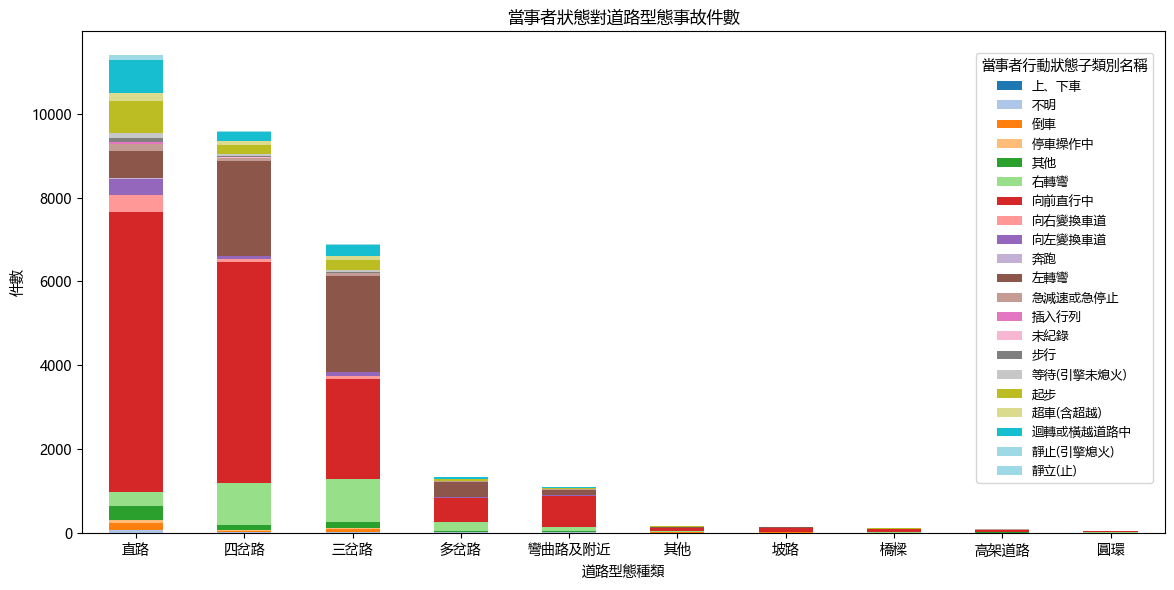

In [162]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

choose = "當事者行動狀態子類別名稱"

f_rbind_data = filtered_rbind_data[filtered_rbind_data['車輛撞擊部位子類別名稱-其他'] != '未紀錄']
cross_tab = pd.crosstab(
    f_rbind_data["道路型態子類別名稱"],
    f_rbind_data[choose]
)

# 排序並刪除臨時總數欄位
cross_tab = cross_tab.assign(總數=cross_tab.sum(axis=1)).sort_values(by="總數", ascending=False).drop(columns=["總數"]).head(10)

# 獲取類別數量
num_categories = cross_tab.columns.size

# 自定義顏色調色盤
colors = cm.get_cmap('tab20', num_categories)  # 使用 'tab20' 調色盤，支持最多 20 種顏色

# 繪製堆疊柱狀圖
ax = cross_tab.plot(kind="bar", stacked=True, figsize=(12, 6), color=[colors(i) for i in range(num_categories)])
plt.title("當事者狀態對道路型態事故件數")
plt.xlabel("道路型態種類")
plt.ylabel("件數")
plt.legend(title=choose, bbox_to_anchor=(0.82, 0.97), loc="upper left", fontsize=9)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
f_rbind_data

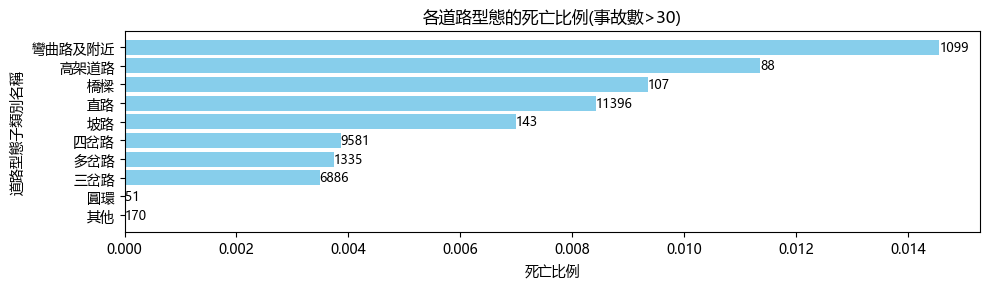

In [195]:
summary = (
    f_rbind_data.groupby("道路型態子類別名稱")
    .agg(總事故數=("死亡", "count"), 死亡事故數=("死亡", "sum"))
    .assign(死亡比例=lambda x: x["死亡事故數"] / x["總事故數"])
    .reset_index()
)
summary = summary[summary["總事故數"] > 30].sort_values(by="死亡比例", ascending=True)

# 繪製條形圖
plt.figure(figsize=(10, 3))
bars = plt.barh(summary["道路型態子類別名稱"], summary["死亡比例"], color="skyblue")

# 添加總事故數作為標籤
for bar, total in zip(bars, summary["總事故數"]):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f"{total}", va="center", fontsize=9)

plt.title("各道路型態的死亡比例(事故數>30)")
plt.xlabel("死亡比例")
plt.ylabel("道路型態子類別名稱")
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_36116\3242166363.py:31: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


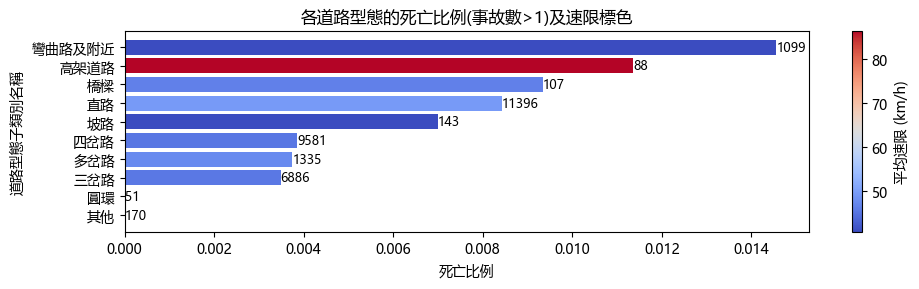

In [198]:
summary = (
    f_rbind_data.groupby("道路型態子類別名稱")
    .agg(
        總事故數=("死亡", "count"),
        死亡事故數=("死亡", "sum"),
        平均速限=("速限-第1當事者", "mean")
    )
    .assign(死亡比例=lambda x: x["死亡事故數"] / x["總事故數"])
    .reset_index()
)

# 篩選總事故數大於 1 並按死亡比例排序
summary = summary[summary["總事故數"] > 30].sort_values(by="死亡比例", ascending=True)

# 分配顏色：根據平均速限分配顏色（標準化速限值）
norm = plt.Normalize(summary["平均速限"].min(), summary["平均速限"].max())
colors = plt.cm.coolwarm(norm(summary["平均速限"]))

# 繪製條形圖
plt.figure(figsize=(10, 3))
bars = plt.barh(summary["道路型態子類別名稱"], summary["死亡比例"], color=colors)

# 添加總事故數作為標籤
for bar, total in zip(bars, summary["總事故數"]):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f"{total}", va="center", fontsize=9)

# 添加顏色條（Colorbar）以顯示速限範圍
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label("平均速限 (km/h)")

plt.title("各道路型態的死亡比例(事故數>1)及速限標色")
plt.xlabel("死亡比例")
plt.ylabel("道路型態子類別名稱")
plt.tight_layout()
plt.show()

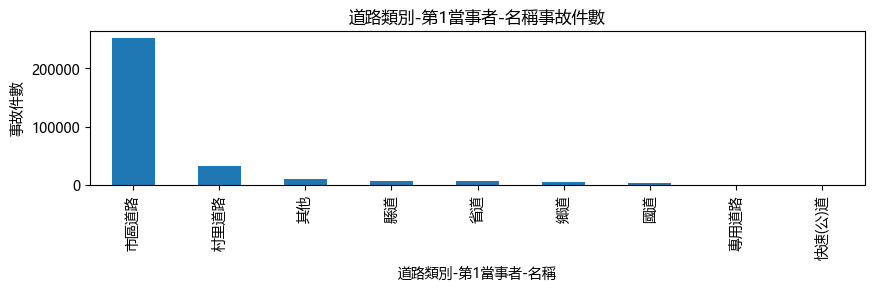

In [167]:
road_quality_counts = filtered_rbind_data["道路類別-第1當事者-名稱"].value_counts()
road_quality_counts.sort_values(ascending=False).plot(kind="bar", figsize=(10, 2))
plt.title("道路類別-第1當事者-名稱事故件數")
plt.xlabel("道路類別-第1當事者-名稱")
plt.ylabel("事故件數")
plt.xticks()
plt.show()



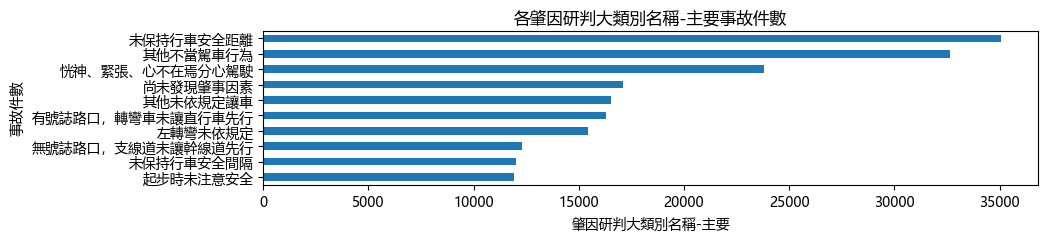

In [89]:
cause_counts = filtered_rbind_data["肇因研判子類別名稱-個別"].value_counts().head(10)
cause_counts.sort_values(ascending=True).plot(kind="barh", figsize=(10, 2))
plt.title("各肇因研判大類別名稱-主要事故件數")
plt.xlabel("肇因研判大類別名稱-主要")
plt.ylabel("事故件數")
plt.xticks()
plt.show()


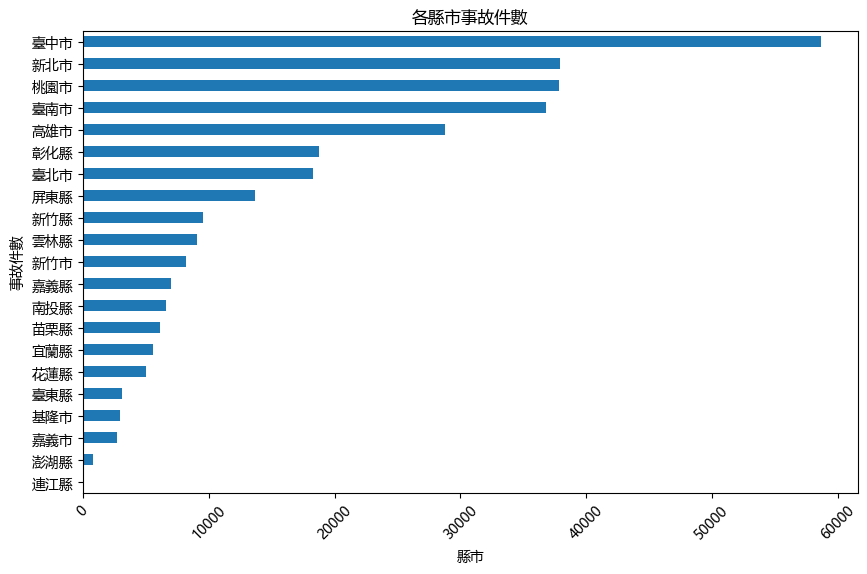

In [90]:
filtered_rbind_data["縣市"] = filtered_rbind_data["發生地點"].str[:3]

location_counts = filtered_rbind_data["縣市"].value_counts()

location_counts.sort_values(ascending=True).plot(kind="barh", figsize=(10, 6))
plt.title("各縣市事故件數")
plt.xlabel("縣市")
plt.ylabel("事故件數")
plt.xticks(rotation=45)
plt.show()

In [38]:
import folium
from folium.plugins import HeatMap

heat_data  = filtered_rbind_data[["緯度", "經度"]].dropna().values.tolist()

map_taiwan = folium.Map(location=[23.5, 121], zoom_start=7)

HeatMap(heat_data, 
        radius=10,
        blur=15,
        ).add_to(map_taiwan)

map_taiwan.save("traffic_heatmap.html")

In [49]:
from scipy.stats import gaussian_kde

coords = filtered_rbind_data[["緯度", "經度"]].dropna().values.T

# 計算 KDE
kde = gaussian_kde(coords)
x_min, x_max = coords[1].min() - 0.01, coords[1].max() + 0.01  # 經度範圍
y_min, y_max = coords[0].min() - 0.01, coords[0].max() + 0.01  # 緯度範圍
x, y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]  # 生成網格
positions = np.vstack([y.ravel(), x.ravel()])  # KDE 需要緯度在前，經度在後
density = kde(positions).reshape(x.shape)  # KDE 計算密度

# 將 KDE 結果添加到地圖
map_taiwan = folium.Map(location=[23.5, 121], zoom_start=7)

# 將 KDE 結果標準化
density = (density - density.min()) / (density.max() - density.min())

# 將密度轉為 folium 格式
for i in range(density.shape[0]):
    for j in range(density.shape[1]):
        if density[i, j] > 0.01:  # 過濾較低的密度值
            folium.CircleMarker(
                location=[y[i, j], x[i, j]],
                radius=5,
                weight=0,
                fill=True,
                fill_opacity=density[i, j],
                fill_color="red"
            ).add_to(map_taiwan)

# 儲存結果
map_taiwan.save("traffic_kde_map.html")